In [1]:
### Importing the necessary libraries ###
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature


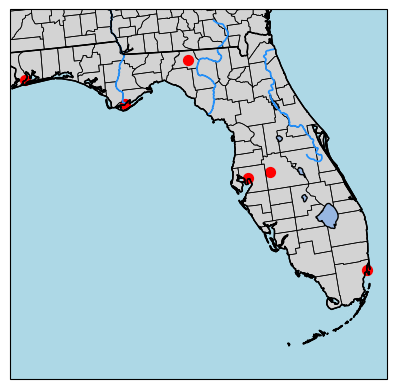

In [6]:
### Creating map of Florida ###
fig, axes = plt.subplots(1, 1, subplot_kw={'projection': ccrs.LambertConformal()})
axes.set_extent([-87.5, -80.0, 24.5, 31.0], crs=ccrs.PlateCarree())
counties = cfeature.NaturalEarthFeature(category='cultural', name='admin_2_counties', scale='10m', facecolor='none', linewidth=0.5)
axes.add_feature(counties, edgecolor='black')
axes.add_feature(cfeature.LAND, facecolor='lightgray')
axes.add_feature(cfeature.COASTLINE, edgecolor='black')
axes.add_feature(cfeature.BORDERS, edgecolor='black')
axes.add_feature(cfeature.LAKES, edgecolor='black')
axes.add_feature(cfeature.RIVERS, edgecolor='dodgerblue', linewidth = 1.25 )
axes.add_feature(cfeature.STATES, edgecolor='black')
axes.add_feature(cfeature.LAND, facecolor='lightgray')
axes.add_feature(cfeature.OCEAN, facecolor='lightblue')

### Creating Points for the Cities being analyzed ###
Tampa = [27.9475, -82.4584]
Miami = [25.7617, -80.1918]
Apalachicola = [29.7257, -84.9828]
Madison = [30.4461, -83.4193]
Lakeland = [27.9944024, -81.9498042]
Pensicola = [30.4213, -87.2169]

### Plotting those points on the map ###
axes.scatter(Tampa[1], Tampa[0], color='red', marker='o', s=50, label='Tampa', transform=ccrs.PlateCarree(), zorder = 1)
axes.scatter(Miami[1], Miami[0], color='red', marker='o', s=50, label='Miami', transform=ccrs.PlateCarree(), zorder = 1)   
axes.scatter(Apalachicola[1], Apalachicola[0], color='red', marker='o', s=50, label='Apalachicola', transform=ccrs.PlateCarree(),zorder = 1)
axes.scatter(Madison[1], Madison[0], color='red', marker='o', s=50, label='Madison', transform=ccrs.PlateCarree(), zorder = 1)
axes.scatter(Lakeland[1], Lakeland[0], color='red', marker='o', s=50, label='Lakeland', transform=ccrs.PlateCarree(), zorder = 1)  
axes.scatter(Pensicola[1], Pensicola[0], color='red', marker='o', s=50, label='Pensicola', transform=ccrs.PlateCarree(), zorder = 1)




(-0.25, 0.25)

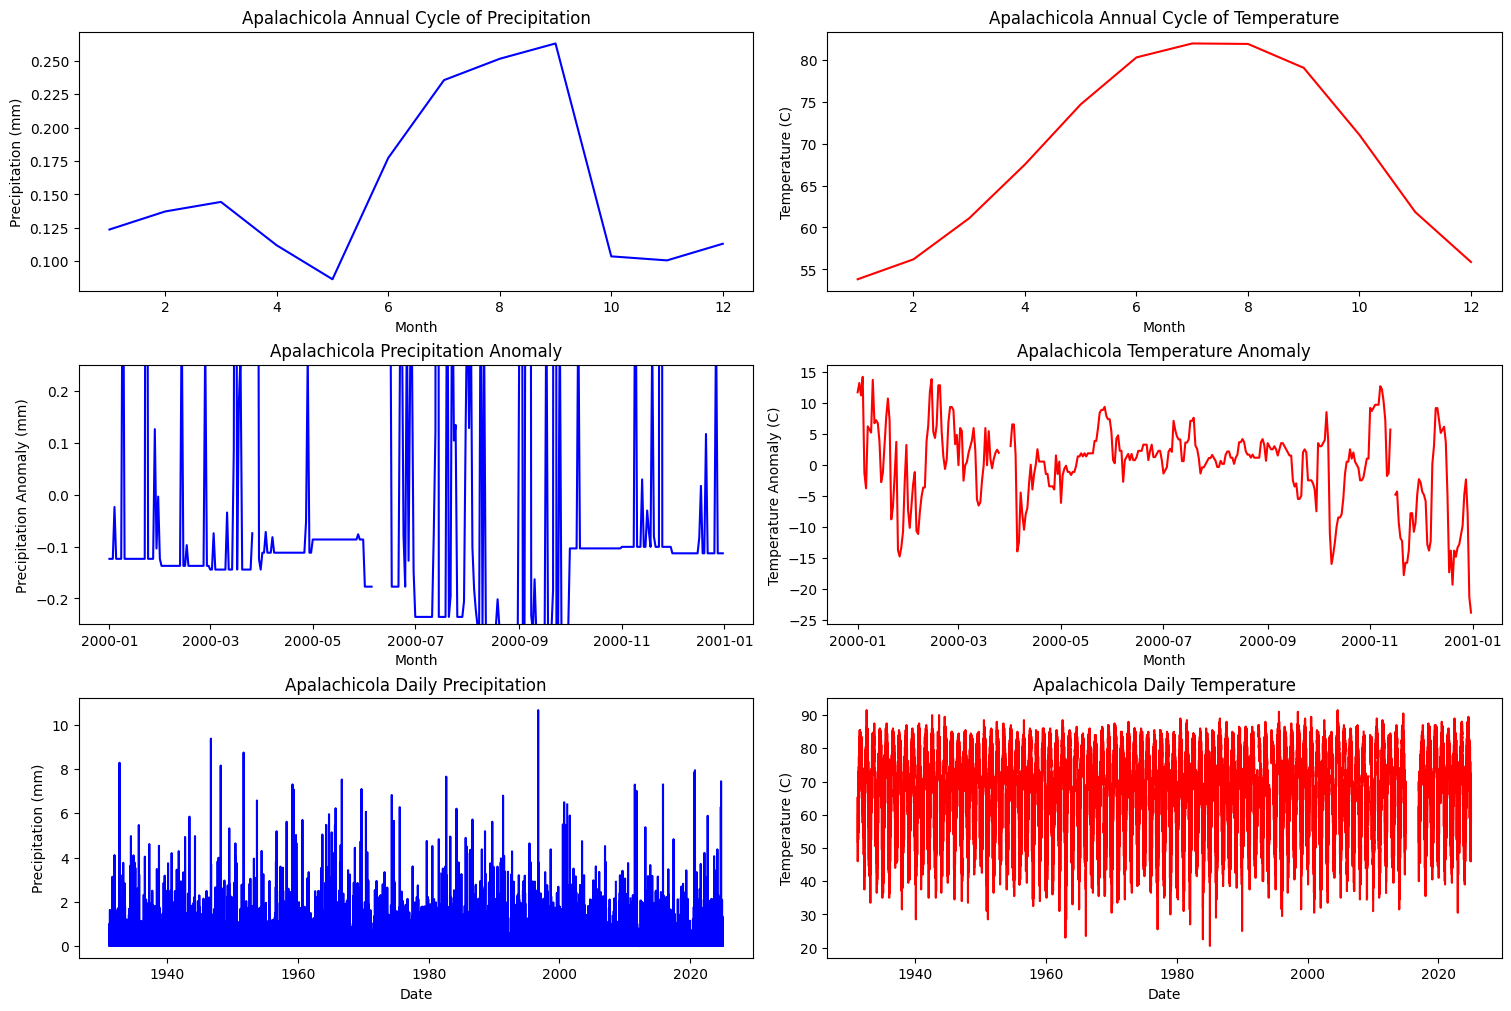

In [99]:
### Reading Data ###
Apalachicola = pd.read_csv('./data/Apalachicola_data.csv', skipinitialspace= True, 
                           na_values=[-99.9, -99.99, -99.90000, -99.9999, -99.999999, -99.9999999])
### Creating Datetime Column ###
Apalachicola['date'] = pd.to_datetime(Apalachicola[['YEAR', 'MONTH', 'DAY']], errors = 'coerce')
### Dropping Rows with NaT in Date Column ### 
Apalachicola = Apalachicola.dropna(subset='date')
### Dropping Unnecessary Columns ###
Apalachicola = Apalachicola.drop(columns=['YEAR', 'MONTH', 'DAY'])
### Creating date column as index ###
Apalachicola = Apalachicola.set_index('date')
### Creating Data to be plotted ###
### Raw Precip and temp data ###
Apalachicola_precip = Apalachicola['PRECIPITATION']
Apalachicola_temp = Apalachicola['MEAN TEMP']
### Mean Precip and temp data ###
Apalachicola_precip_mean = Apalachicola_precip.mean()
Apalachicola_temp_mean = Apalachicola_temp.mean()
### Annual Cycle of Precip and Temp ### 
Apalachicola_precip_ancycle = Apalachicola_precip.groupby(Apalachicola.index.month).mean()
Apalachicola_temp_ancycle = Apalachicola_temp.groupby(Apalachicola.index.month).mean()
### Anomaly Data precip and temp ###
Apalachicola_precip_anomaly = Apalachicola_precip_mean - Apalachicola_precip_ancycle
Apalachicola_temp_anomaly = Apalachicola_temp_mean - Apalachicola_temp_ancycle
### Select 4 year time period and removing annual cycle ###
Apalachicola['Monthly Mean Precip'] = Apalachicola.index.month.map(Apalachicola_precip_ancycle)
Apalachicola_precip_anom = Apalachicola['PRECIPITATION'] - Apalachicola['Monthly Mean Precip']
Apalachicola_precip_anom = Apalachicola_precip_anom.loc['2000-01-01':'2000-12-31']
Apalachicola['Monthly Mean Temp'] = Apalachicola.index.month.map(Apalachicola_temp_ancycle)
Apalachicola_temp_anom = Apalachicola['MEAN TEMP'] - Apalachicola['Monthly Mean Temp']
Apalachicola_temp_anom = Apalachicola_temp_anom.loc['2000-01-01':'2000-12-31']


### Plotting the Data ###
fig, axes = plt.subplots(3, 2, figsize=(15, 10), constrained_layout=True)
axes[0,0].plot(Apalachicola_precip_ancycle.index, Apalachicola_precip_ancycle, color='blue')
axes[0,1].plot(Apalachicola_temp_ancycle.index, Apalachicola_temp_ancycle, color='red')
axes[1,0].plot(Apalachicola_precip_anom.index, Apalachicola_precip_anom, color='blue')
axes[1,1].plot(Apalachicola_temp_anom.index, Apalachicola_temp_anom, color='red')
axes[2,0].plot(Apalachicola_precip.index, Apalachicola_precip, color='blue')
axes[2,1].plot(Apalachicola_temp.index, Apalachicola_temp, color='red')

### Adding finishing touches to Plots such as titles, labels, and legends ###
axes[0,0].set_title('Apalachicola Annual Cycle of Precipitation')
axes[0,1].set_title('Apalachicola Annual Cycle of Temperature')
axes[1,0].set_title('Apalachicola Precipitation Anomaly')
axes[1,1].set_title('Apalachicola Temperature Anomaly')
axes[2,0].set_title('Apalachicola Daily Precipitation')
axes[2,1].set_title('Apalachicola Daily Temperature')
axes[0,0].set_ylabel('Precipitation (mm)')
axes[0,1].set_ylabel('Temperature (C)')
axes[1,0].set_ylabel('Precipitation Anomaly (mm)')
axes[1,1].set_ylabel('Temperature Anomaly (C)')
axes[2,0].set_ylabel('Precipitation (mm)')
axes[2,1].set_ylabel('Temperature (C)')
axes[0,0].set_xlabel('Month')
axes[0,1].set_xlabel('Month')
axes[1,0].set_xlabel('Month')
axes[1,1].set_xlabel('Month')
axes[2,0].set_xlabel('Date')
axes[2,1].set_xlabel('Date')
axes[1,0].set_ylim(-0.25, 0.25)

In [98]:
### Creating a table of Values of Precipitation ###
### Finding the mean, median, std, error of mean, and 95% confidence interval ###
Apalachicola_precip_mean = Apalachicola_precip_mean
Apalachicola_precip_median = Apalachicola_precip.median()
Apalachicola_precip_std = Apalachicola_precip.std()
print (Apalachicola_precip_std, Apalachicola_precip_mean, Apalachicola_precip_median)

### Creating Table ###
print('Apalachicola Precipitation Statistics:')
print('-'*40)
Statistics = ['Mean', 'Median', 'Std']
for var in Statistics:
    if var == 'Mean':
        print(f'{var}: {Apalachicola_precip_mean:.3f} mm')
    elif var == 'Median':
        print(f'{var}: {Apalachicola_precip_median:.3f} mm')
    elif var == 'Std':
        print(f'{var}: {Apalachicola_precip_std:.3f}')
print('-'*40)


0.5031611430763024 0.15416358706645247 0.0
Apalachicola Precipitation Statistics:
----------------------------------------
Mean: 0.154 mm
Median: 0.000 mm
Std: 0.503
----------------------------------------
